In [21]:
from networkx import radius
import pandas as pd
import numpy as np

# function input0x input0y input1x input1y input2x input2y input3x input3y

op_dict = {0: '+', 1: '-', 2: '*', 3: '/', 4: 'IN'}

class Node:
    def __init__(self, x, y, function, input0x=None, input0y=None, input1x=None, input1y=None, input2x=None, input2y=None, input3x=None, input3y=None):
        self.x = x
        self.y = y
        self.function = function
        self.input0x = input0x
        self.input0y = input0y
        self.input1x = input1x
        self.input1y = input1y
        self.input2x = input2x
        self.input2y = input2y
        self.input3x = input3x
        self.input3y = input3y

    def __str__(self):
        op = op_dict.get(self.function, '?')
        return f"Node(({self.x}, {self.y}), function={op}, inputs=({self.input0x},{self.input0y}),({self.input1x},{self.input1y}),({self.input2x},{self.input2y}),({self.input3x},{self.input3y}))"

    def __repr__(self):
        return self.__str__()

def decode_nodes(arr):
    nodes = []
    # Loop over every 9 elements (each node has 9 values: 1 function + 8 input coordinates)
    for i in range(0, len(arr), 9):
        if i + 8 < len(arr):  # Ensure we have all 9 values
            function = arr[i]
            
            # Extract input coordinates (4 pairs: x,y for each input)
            input0x, input0y = arr[i+1], arr[i+2]
            input1x, input1y = arr[i+3], arr[i+4]
            input2x, input2y = arr[i+5], arr[i+6]
            input3x, input3y = arr[i+7], arr[i+8]
            
            node_index = i // 9
            total_nodes = len(arr) // 9
            # Calculate x, y coordinates based on grid arrangement
            grid_size = int(np.sqrt(total_nodes))
            x = node_index % grid_size
            y = node_index // grid_size
            
            # Create node object
            node = Node(x, y, function, input0x, input0y, input1x, input1y, 
                        input2x, input2y, input3x, input3y)
            
            nodes.append(node)
    
    return nodes

def generate_random_nodes(num_nodes=100):
    """Generate a random array representing nodes for decode_nodes function."""
        
    arr = []
    grid_size = int(np.sqrt(num_nodes))
    
    def generate_random_coords(x, y, x_radius=1, y_radius=2):
        # Generate random coordinates within a given length
        x_offset = np.random.randint(-x_radius, 0)  # Change 0 to x_radius to allow cycles
        y_offset = np.random.randint(-y_radius, y_radius + 1)
        return max(x + x_offset, 0), max(min(y + y_offset, grid_size - 1), 0)
    
    for i in range(num_nodes):
        # Random function (0-3 for +, -, *, /)
        function = np.random.randint(0, 4)
        
        # Calculate node position in grid
        x = i % grid_size
        y = i // grid_size
        
        # For nodes in column 0: set all inputs to None to indicate no inputs
        if x == 0:
            input0x = input0y = input1x = input1y = None
            input2x = input2y = input3x = input3y = None
            function = 4  # Set function to 'INPUT' for input nodes
        else:
            # For nodes in column 9: ensure inputs don't come from column 9
            if x == 9:
                input0x, input0y = generate_random_coords(x-1, y)
                input1x, input1y = generate_random_coords(x-1, y)
                # input2x, input2y = generate_random_coords(x-1, y)
                # input3x, input3y = generate_random_coords(x-1, y)
            else:
                # Random input coordinates for other nodes
                input0x, input0y = generate_random_coords(x-1, y)
                input1x, input1y = generate_random_coords(x-1, y)
        
        # Add all 9 values for this node (1 function + 8 input coordinates)
        arr.extend([function, input0x, input0y, input1x, input1y, input2x, input2y, input3x, input3y])
        
    return np.array(arr)

arr = generate_random_nodes(100)
arr


array([4, None, None, None, None, None, None, None, None, 1, 0, 2, 0, 2,
       None, None, None, None, 3, 0, 0, 0, 1, None, None, None, None, 0,
       1, 2, 1, 0, None, None, None, None, 1, 2, 0, 2, 0, None, None,
       None, None, 0, 3, 2, 3, 0, None, None, None, None, 0, 4, 2, 4, 1,
       None, None, None, None, 1, 5, 0, 5, 0, None, None, None, None, 2,
       6, 1, 6, 0, None, None, None, None, 0, 7, 1, 7, 0, None, None,
       None, None, 4, None, None, None, None, None, None, None, None, 2,
       0, 1, 0, 1, None, None, None, None, 1, 0, 2, 0, 0, None, None,
       None, None, 3, 1, 2, 1, 3, None, None, None, None, 3, 2, 1, 2, 0,
       None, None, None, None, 0, 3, 0, 3, 0, None, None, None, None, 0,
       4, 0, 4, 2, None, None, None, None, 0, 5, 1, 5, 1, None, None,
       None, None, 0, 6, 0, 6, 1, None, None, None, None, 0, 7, 3, 7, 3,
       None, None, None, None, 4, None, None, None, None, None, None,
       None, None, 2, 0, 2, 0, 1, None, None, None, None, 2, 0, 1,

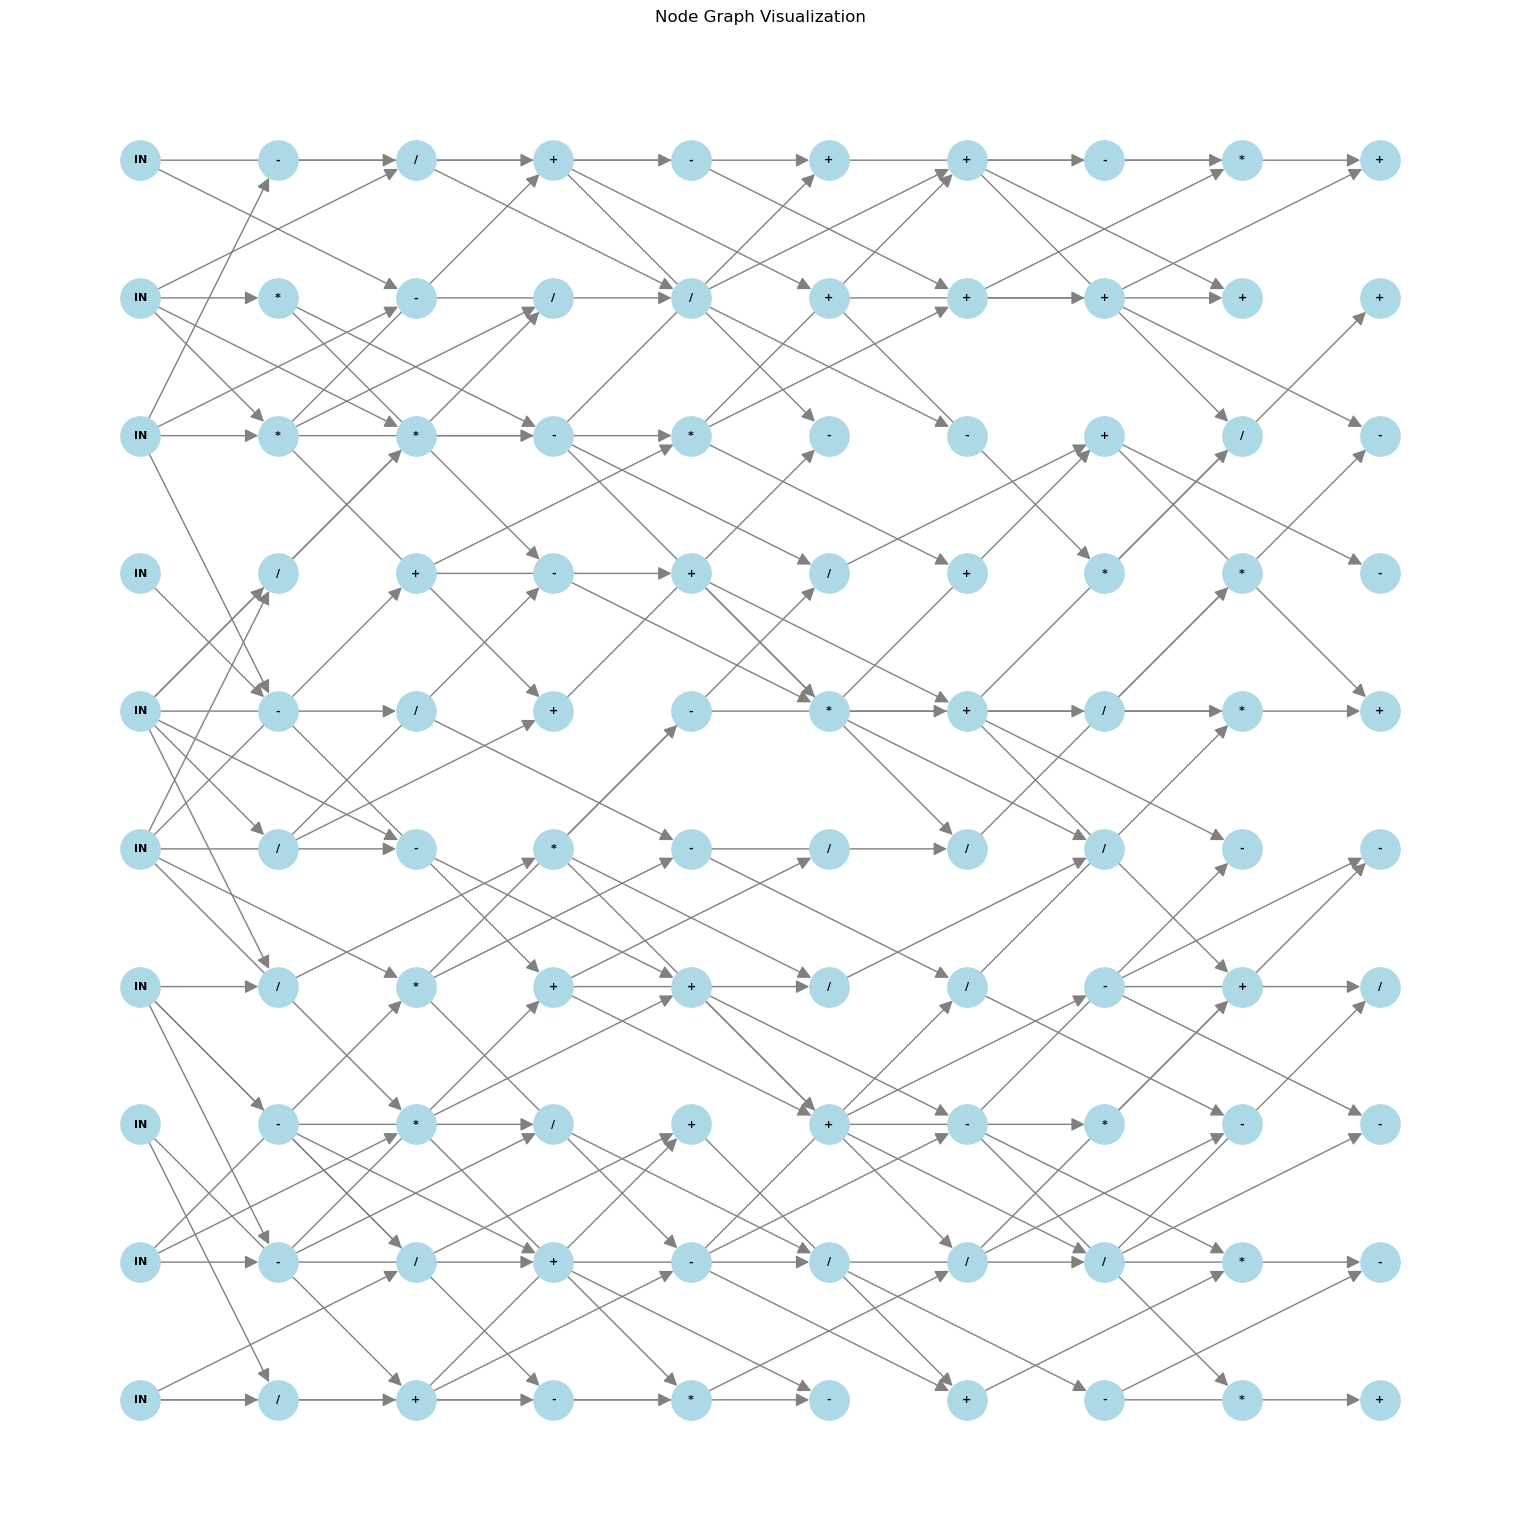

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = decode_nodes(arr.flatten())

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for node in nodes:
    node_id = f"N{node.x}_{node.y}"
    G.add_node(node_id, function=op_dict[node.function], pos=(node.x, -node.y))

# Add edges based on connections between nodes
for node in nodes:
    node_id = f"N{node.x}_{node.y}"
    
    # Connect inputs (each node can have up to 4 inputs)
    inputs = [(node.input0x, node.input0y), (node.input1x, node.input1y), 
              (node.input2x, node.input2y), (node.input3x, node.input3y)]
    
    for input_x, input_y in inputs:
        input_node_id = f"N{input_x}_{input_y}"
        if input_node_id in G.nodes():
            G.add_edge(input_node_id, node_id)

# Set up positions and labels for visualization
pos = nx.get_node_attributes(G, 'pos')
labels = {node: G.nodes[node]['function'] for node in G.nodes()}

# Create the plot
plt.figure(figsize=(15, 15))
nx.draw(G, pos, labels=labels, node_color='lightblue', 
        node_size=800, font_size=8, font_weight='bold', 
        arrows=True, arrowsize=20, edge_color='gray')
plt.title("Node Graph Visualization")
plt.show()